# CNN for fNIRS data analysis for Human Activity Recognition (HAR)

In [1]:
% ls ../../../datasets/fNIRs_data/

P12-4-17-2018/  P14-4-18-2018/  P16-4-18-2018/
P13-4-17-2018/  P15-4-18-2018/  P17-4-18-2018/


In [2]:
% ls ../../../datasets/fNIRs_data/P12-4-17-2018/

1. Right Hand/  2. Both Hands/  3. Left Hand/  4. Right Leg/  5. Left Leg/


In [3]:
% ls ../../../datasets/fNIRs_data/P12-4-17-2018/1.\ Right\ Hand

2018-04-17_006/
fNIR_data.txt
head20180417-145130.txt
NIRS-2018-04-17_006_deoxyhb_T141to2511_C1to20.txt
NIRS-2018-04-17_006_oxyhb_T141to2511_C1to20.txt
Processed/
r_hand20180417-145128.txt
r_lower_arm20180417-145129.txt
r_upper_arm20180417-145129.txt


In [4]:
import numpy as np
import os
import pandas as pd

# % find ../../datasets/fNIRs_data/ | grep fNIR_data # NOT WORKING!!
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data/')
allpaths = sorted(allpaths, reverse=False)
# print(allpaths, len(allpaths))
allpaths, len(allpaths)

(['/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P12-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P13-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P14-4-18-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data/P14-4-18-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data

In [5]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    file = pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel'],
                         header=None)
    df.append(file)
    
for each in range(len(df)):
    print(df[each].shape)
    df[each]=df[each].drop(axis=1, columns=None, index=None, labels=['time', 'sample'])
    df[each] = df[each].dropna()
    df[each]['channel.39'] = df[each]['channel.39'].astype(str).str[1:-1].astype(float)
print(len(df))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2372, 42)
(1210, 42)
(2378, 42)
(1202, 42)
(1222, 42)
(2405, 42)
(1196, 42)
(2380, 42)
(1203, 42)
(1242, 42)
(2373, 42)
(1202, 42)
(2386, 42)
(1196, 42)
(1229, 42)
(2387, 42)
(1224, 42)
(2379, 42)
(1230, 42)
(1227, 42)
(2384, 42)
(1230, 42)
(2375, 42)
(1196, 42)
(1197, 42)
(2373, 42)
(1220, 42)
(2372, 42)
(1223, 42)
(1222, 42)
30


In [6]:
data, labels = [], []
for each in range(0, len(df), 1):
    dfmat = df[each].as_matrix()
    label = (each%5)+1
    print(dfmat.dtype, dfmat.shape, label)
    data.append(dfmat)
    labels.append(label)
len(data), len(labels)

float64 (2371, 40) 1
float64 (1209, 40) 2
float64 (2377, 40) 3
float64 (1201, 40) 4
float64 (1221, 40) 5
float64 (2404, 40) 1
float64 (1195, 40) 2
float64 (2379, 40) 3
float64 (1202, 40) 4
float64 (1241, 40) 5
float64 (2372, 40) 1
float64 (1201, 40) 2
float64 (2385, 40) 3
float64 (1195, 40) 4
float64 (1228, 40) 5
float64 (2386, 40) 1
float64 (1223, 40) 2
float64 (2378, 40) 3
float64 (1229, 40) 4
float64 (1226, 40) 5
float64 (2383, 40) 1
float64 (1229, 40) 2
float64 (2374, 40) 3
float64 (1195, 40) 4
float64 (1196, 40) 5
float64 (2372, 40) 1
float64 (1219, 40) 2
float64 (2371, 40) 3
float64 (1222, 40) 4
float64 (1221, 40) 5


(30, 30)

In [7]:
# This is very much like a convolution for extracting the windows
# size/width, stride/overlap, padding, dilation, num filters/out channel
def minibatching(X, Y, stride, width):
    Xmb, Ymb = [], []
    print(len(X), len(Y))
    # 1st and 1st
    for eachX in range(len(X)):
        num_mb = ((X[eachX].shape[0]-width)//stride)+1
        for each in range(num_mb):
            # The max is (num_mb-1)*stride+width==X[idx].shape[0]
            # The last each is (num_mb-1)
            # each = ((each-1)*stride)+width
            each *= stride
            Xmb.append(X[eachX][each:each+width])
            # There is only one label for one image signal or signal window or temporal window
            #Ymb.append(Y[eachX][each:each+1])
            Ymb.append(Y[eachX])
    return Xmb, Ymb

In [8]:
# Width is based on the sampling rate which is roughly about 233 points per window
# for 10sec rest and 20 sec activity
width = 250
Xmb, Ymb = minibatching(X=data, Y=labels, stride=1, width=width)
# for eachX, eachY in zip(Xmb, Ymb):
#     print(eachX.shape, eachY)
print(len(Xmb), len(Ymb))
print(Xmb[0].shape, Xmb[0].dtype)
print(Ymb[0])

30 30
42935 42935
(250, 40) float64
1


In [9]:
# Conversion from python list to numpy array
X, Y=np.array(object=Xmb, dtype=float), np.array(object=Ymb, dtype=int)
print(X.shape, X.dtype, Y.shape, Y.dtype)

(42935, 250, 40) float64 (42935,) int64


In [10]:
# Now I should devide the data into train and test
# Train and valid split
from sklearn.model_selection import train_test_split

# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain.dtype, Xtest.dtype, Ytrain.dtype, Ytest.dtype)

(30054, 250, 40) (12881, 250, 40) (30054,) (12881,)
float64 float64 int64 int64


In [11]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)

(30054, 250, 40) float64
(12881, 250, 40) float64


In [12]:
# Onehotencoding of the output labels
def onehot(labels, n_class):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

print(Y.max(axis=0), Ytrain.max(axis=0), Ytest.max(axis=0))
# # assert Y.max(axis=0) == Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

5 5 5
(30054, 5) float64 (12881, 5) float64


In [13]:
# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(21037, 250, 40) (9017, 250, 40) (12881, 250, 40) float64 float64 float64
(21037, 5) (9017, 5) (12881, 5) float64 float64 float64


In [14]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [15]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0], Xvalid.shape[1], Xvalid.shape[2]
X = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(X.shape, X.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(9017, 250, 40) <dtype: 'float32'> (21037, 250, 40) float64 (9017, 250, 40) float64 (12881, 250, 40) float64


In [16]:
# This is the output tensor for labels
N, Cout = Yvalid.shape[0], Yvalid.shape[1]
Y = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
print(Y.shape, Y.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(9017, 5) <dtype: 'float32'> (21037, 5) float64 (9017, 5) float64 (12881, 5) float64


In [17]:
print(X.shape, X.dtype)
Wwidth, Wchannels, Wnumber = X.shape[1].value//2, X.shape[2].value, X.shape[2].value*2
shape = [Wwidth, Wchannels, Wnumber]
initial_value=tf.random_normal(dtype=X.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
Wconv = tf.Variable(dtype=X.dtype, initial_value=initial_value, name=None, trainable=True)
print(Wconv.shape, Wconv.dtype)
Xconv = tf.nn.conv1d(data_format='NWC', filters=Wconv, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=X)
Xconv = tf.maximum(name=None, x=(-0.1*Xconv), y=Xconv)
print(Xconv.shape, Xconv.dtype)

(9017, 250, 40) <dtype: 'float32'>
(125, 40, 80) <dtype: 'float32_ref'>
(9017, 125, 80) <dtype: 'float32'>


In [18]:
# This is the multiplication layer
# this part is flatening the input
shape = [Xconv.shape[0].value, Xconv.shape[1].value*Xconv.shape[2].value]
Xconv_reshaped = tf.reshape(name=None, shape=shape, tensor=Xconv)
print(Xconv_reshaped.shape, Xconv_reshaped.dtype)
# their first axis or dimension stay the same
shape = [Xconv_reshaped.shape[1].value, Y.shape[1].value]
initial_value = tf.random_normal(dtype=Xconv_reshaped.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
W = tf.Variable(dtype=Xconv_reshaped.dtype, initial_value=initial_value, name=None, trainable=True)
print(W.shape, W.dtype)
# The actual multiplication
# Y_ = Xconv_reshaped @ W
Y_ = tf.matmul(a=Xconv_reshaped, b=W, name=None)
print(Y_.shape, Y_.dtype)
print(Y.shape, Y.dtype)

(9017, 10000) <dtype: 'float32'>
(10000, 5) <dtype: 'float32_ref'>
(9017, 5) <dtype: 'float32'>
(9017, 5) <dtype: 'float32'>


In [19]:
# Now I need to calculate the loss
loss_tensor = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Y_, name=None)
print(loss_tensor.shape, loss_tensor.dtype)
loss = tf.reduce_mean(axis=0, input_tensor=loss_tensor, name=None)
print(loss)

(9017,) <dtype: 'float32'>
Tensor("Mean:0", shape=(), dtype=float32)


In [20]:
# Backprop and SGD now using adam
opt = tf.train.AdamOptimizer().minimize(loss)
print(opt)

name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [22]:
print(Y_.shape, Y_.dtype, Y.shape, Y.dtype)

(9017, 5) <dtype: 'float32'> (9017, 5) <dtype: 'float32'>


In [28]:
# Accuracy
# tf.argmax(
#     input,
#     axis=None,
#     name=None,
#     dimension=None,
#     output_type=tf.int64
# )
# Y_NxCout, N:axis 1, Cout: axis 2
Y_argmax = tf.argmax(axis=1, name=None, input=Y_, output_type=tf.int32)
print(Y_argmax.shape, Y_argmax.dtype)

# # tf.nn.softmax(
# #     logits,
# #     axis=None,
# #     name=None,
# #     dim=None
# # )
# # softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
# prob = tf.nn.softmax(axis=1, logits=logits, name=None)
# print(prob.shape, prob.dtype)
# Ypred2 = tf.argmax(axis=1, input=prob, name=None, output_type=tf.int32) 
# print(Ypred2.shape, Ypred2.dtype)

print(Y.shape, Y.dtype)
Yargmax = tf.argmax(axis=1, input=Y, name=None, output_type=tf.int32)
print(Yargmax.shape, Yargmax.dtype)

acc_tensor = tf.equal(name=None, x=Y_argmax, y=Yargmax)
print(acc_tensor.shape, acc_tensor.dtype)
# cast bool to int datatype for equal
acc_tensor = tf.cast(dtype=tf.float32, name=None, x=acc_tensor)
print(acc_tensor.shape, acc_tensor.dtype)
acc = tf.reduce_mean(axis=0, input_tensor=acc_tensor)
print(acc.shape, acc.dtype)

(9017,) <dtype: 'int32'>
(9017, 5) <dtype: 'float32'>
(9017,) <dtype: 'int32'>
(9017,) <dtype: 'bool'>
(9017,) <dtype: 'float32'>
() <dtype: 'float32'>


In [29]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [30]:
# We should save the after training and validation
saver = tf.train.Saver() 
train_loss_mean, valid_loss_mean = [], []
train_acc_mean, valid_acc_mean = [], []

# now that we can calculate loss and optimize, we can start a session for calculating the error.
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # for every epoch start feeding the arrays into the tensors in the model
    for epoch in range(0, 100, 1):
        train_loss, valid_loss = [], []
        train_acc, valid_acc = [], []
        
        # Training minibatches and feed them into the tensor
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=Xvalid.shape[0]):
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, _, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, opt, acc])
            train_loss.append(lossarr)
            train_acc.append(accarr)
            
        # Validation now which is one batch on every iteration
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=Xvalid.shape[0]): 
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr = sess.run(feed_dict=feed_dict, fetches=[loss])
            valid_loss.append(lossarr)
            valid_acc.append(accarr)
        
        # printing out train and validation loss
        print('epoch:', epoch+1, 'train_loss:', np.mean(train_loss), 'valid_loss:', np.mean(valid_loss),
             'train_acc:', np.mean(train_acc), 'valid_acc:', np.mean(valid_acc))
        
        # Every epoch, for drawing the plot and their learning curve
        train_loss_mean.append(np.mean(train_loss))
        valid_loss_mean.append(np.mean(valid_loss))
        train_acc_mean.append(np.mean(train_acc))
        valid_acc_mean.append(np.mean(valid_acc))
        
    # After all epochs and at the end of training and validation
    saver.save(sess,'checkpoints/cnn-fnirs-har.ckpt')

epoch: 1 train_loss: 7531.5137 valid_loss: 5997.881 train_acc: 0.1264833 valid_acc: 0.1226572
epoch: 2 train_loss: 5575.5957 valid_loss: 4447.0215 train_acc: 0.104912944 valid_acc: 0.09615172
epoch: 3 train_loss: 4189.857 valid_loss: 3408.1663 train_acc: 0.13003215 valid_acc: 0.16125096
epoch: 4 train_loss: 3269.1143 valid_loss: 2817.5278 train_acc: 0.21110125 valid_acc: 0.2510813
epoch: 5 train_loss: 2721.2397 valid_loss: 2339.6924 train_acc: 0.24309637 valid_acc: 0.26405677
epoch: 6 train_loss: 2215.1638 valid_loss: 1734.3824 train_acc: 0.25451922 valid_acc: 0.27082178
epoch: 7 train_loss: 1596.8557 valid_loss: 1199.8086 train_acc: 0.29788178 valid_acc: 0.30841744
epoch: 8 train_loss: 1160.6404 valid_loss: 1019.8166 train_acc: 0.3719086 valid_acc: 0.38682488
epoch: 9 train_loss: 1028.4563 valid_loss: 977.3699 train_acc: 0.31473884 valid_acc: 0.2922258
epoch: 10 train_loss: 958.66125 valid_loss: 851.00287 train_acc: 0.3211711 valid_acc: 0.32194743
epoch: 11 train_loss: 828.0416 valid_

epoch: 87 train_loss: 41.10695 valid_loss: 41.64492 train_acc: 0.82893425 valid_acc: 0.83253855
epoch: 88 train_loss: 40.513657 valid_loss: 41.08421 train_acc: 0.8305423 valid_acc: 0.83442384
epoch: 89 train_loss: 39.94466 valid_loss: 40.50962 train_acc: 0.8318731 valid_acc: 0.8359765
epoch: 90 train_loss: 39.37677 valid_loss: 39.990646 train_acc: 0.83364755 valid_acc: 0.8377509
epoch: 91 train_loss: 38.819534 valid_loss: 39.4756 train_acc: 0.83536655 valid_acc: 0.83908176
epoch: 92 train_loss: 38.296402 valid_loss: 38.921288 train_acc: 0.8372519 valid_acc: 0.8412998
epoch: 93 train_loss: 37.77303 valid_loss: 38.42873 train_acc: 0.83869356 valid_acc: 0.84229785
epoch: 94 train_loss: 37.239464 valid_loss: 37.941555 train_acc: 0.8410225 valid_acc: 0.84462684
epoch: 95 train_loss: 36.734543 valid_loss: 37.44488 train_acc: 0.84124434 valid_acc: 0.8449595
epoch: 96 train_loss: 36.239532 valid_loss: 36.963554 train_acc: 0.8427415 valid_acc: 0.8467339
epoch: 97 train_loss: 35.73651 valid_loss

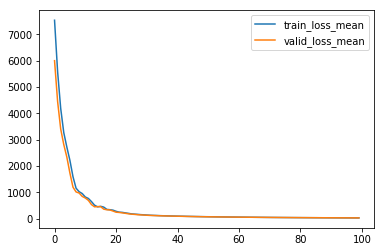

In [31]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss_mean, label='train_loss_mean')
mplot.plot(valid_loss_mean, label='valid_loss_mean')
mplot.legend()

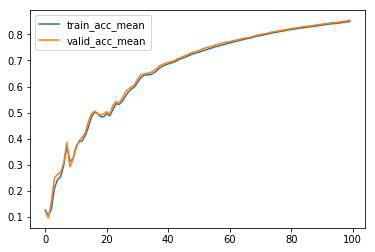

In [35]:
mplot.plot(train_acc_mean, label='train_acc_mean')
mplot.plot(valid_acc_mean, label='valid_acc_mean')
mplot.legend()

In [32]:
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # Loading the trained and validated model
    saver.restore(save_path=tf.train.latest_checkpoint(checkpoint_dir='checkpoints/'), sess=sess)
    
    # Saving the test loss for every batch/minibtch
    test_loss = []
    test_acc = []
    
    # applying the loaded model on test data
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=Xvalid.shape[0]): 
        # X_NxWXCin, Y_NxCout
        feed_dict={X:Xarr, Y:Yarr}
        lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
        test_loss.append(lossarr)
        test_acc.append(accarr)
        
    # Printing the test loss
    print('test_loss:', np.mean(test_loss), 'test acc', np.mean(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/cnn-fnirs-har.ckpt
test_loss: 35.23574 test acc 0.8452922
